# 感知器实现

In [49]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# 从鸢尾花数据集上训练感知器模型
为了实现感知器,将从鸢尾花数据集加载Setosa和Verisicolor两种花的数据.

In [50]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

提取与50朵setosa和50朵versicolor鸢尾花相对应的100个类标签

In [52]:
#选择setosa和versicolor
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)
#提取第一列和第三列特征
X = df.iloc[0:100, [0,2]].values

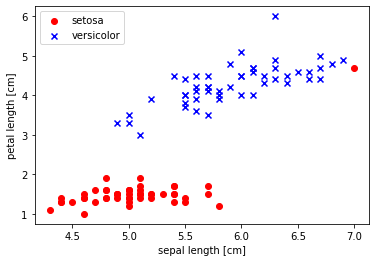

In [53]:
#数据绘图
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0],X[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

训练感知器算法,此外也将绘制每个迭代的分类错误,以检查算法是否收敛,并找到分隔两类鸢尾花的决策边界.

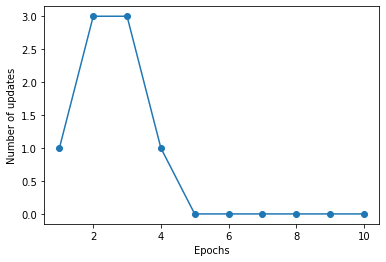

In [54]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

感知器在第六次之后开始收敛,下面通过一个函数来完成数据决策边界的可视化

In [69]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.2):
    #定义颜色和标记并通过Listedcolormap来从颜色列表创建色度图
    makers = ('s','x','o','^','v')
    colors = ('red', 'blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #通过meshgrid函数创建网络阵列xx1和xx2,利用特征向量确定特征的最小和最大值.
    x1_min,x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() -1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)#对网格矩阵进行扁平化处理
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    #画范例
    for idx, cl in enumerate(np.unique(y)):# enumerate(枚举) 
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker=makers[idx],
                    label=cl,
                    edgecolor='black')


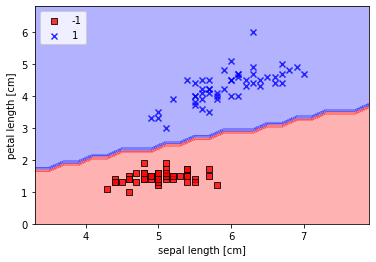

In [70]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()